In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
# ! pip install -q kaggle
# from google.colab import files 
# files.upload()
# ! mkdir ~/.kaggle 
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json

In [3]:
# ! mkdir digit_recognizer

In [4]:
# ! ls

In [5]:
# ! ls digit_recognizer/

In [6]:
# kaggle competitions download -c digit-recognizer

In [7]:
! ls

cleanerNumberRecoginizor.ipynb	sample_submission.csv  train.csv
digit-recognizer.zip		test.csv


In [8]:
# ! mv train.csv.zip digit_recognizer/
# ! mv test.csv.zip digit_recognizer/

In [9]:
# ! unzip digit_recognizer/train.csv.zip
# ! unzip digit_recognizer/test.csv.zip 

In [10]:
# ! mv train.csv digit_recognizer/
# ! mv test.csv digit_recognizer/


In [11]:
# ! ls digit_recognizer/

In [12]:
# ! mv digit_recognizer/train.csv .
# ! mv digit_recognizer/test.csv .
df = pd.read_csv("train.csv")
# df.head()
train_label = df["label"]
train_image = df.drop("label", axis = 1)

In [13]:
train_image, test_image, train_label, test_label = train_test_split(
    train_image, train_label, test_size=0.2, random_state=42)

In [14]:
train_image = tf.reshape(train_image, [33600, 28 ,28]).numpy()
test_image = tf.reshape(test_image, [8400, 28 ,28]).numpy()

In [15]:
train_label = np.array(train_label)
test_label = np.array(test_label)

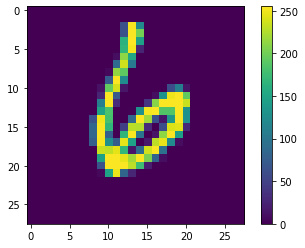

In [16]:
plt.figure()
plt.imshow(train_image[0])
plt.colorbar()
plt.grid(False)
plt.show()

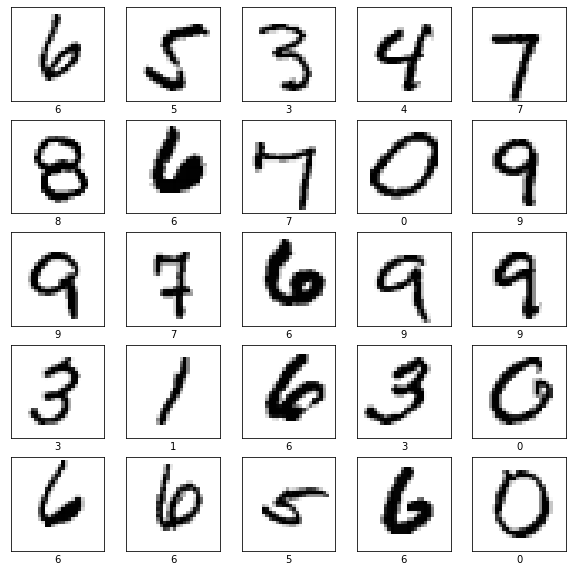

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_image[i], cmap=plt.cm.binary)
    plt.xlabel(train_label[i])
plt.show()

In [18]:
es = EarlyStopping(monitor='accuracy', mode='min', verbose=1, patience=5, min_delta=0.0001)

In [19]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(128, activation = "relu"),
                             tf.keras.layers.Dropout(.15, input_shape=(28,28)),
                             tf.keras.layers.Dense(10)
])

In [20]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

history = model.fit(train_image, train_label, epochs=20, 
                    validation_data=(test_image, test_label))

Epoch 1/20
1050/1050 [==============================] - 1s 1ms/step - loss: 12.7723 - accuracy: 0.7135 - val_loss: 0.7515 - val_accuracy: 0.8175
Epoch 2/20
1050/1050 [==============================] - 1s 908us/step - loss: 0.6913 - accuracy: 0.8192 - val_loss: 0.5314 - val_accuracy: 0.8850
Epoch 3/20
1050/1050 [==============================] - 1s 902us/step - loss: 0.5138 - accuracy: 0.8639 - val_loss: 0.5146 - val_accuracy: 0.8902
Epoch 4/20
1050/1050 [==============================] - 1s 882us/step - loss: 0.4514 - accuracy: 0.8798 - val_loss: 0.3847 - val_accuracy: 0.9076
Epoch 5/20
1050/1050 [==============================] - 1s 904us/step - loss: 0.4115 - accuracy: 0.8962 - val_loss: 0.3705 - val_accuracy: 0.9225
Epoch 6/20
1050/1050 [==============================] - 1s 915us/step - loss: 0.3539 - accuracy: 0.9080 - val_loss: 0.3457 - val_accuracy: 0.9127
Epoch 7/20
1050/1050 [==============================] - 1s 913us/step - loss: 0.3377 - accuracy: 0.9105 - val_loss: 0.2951 - 

In [21]:
# model.fit(train_image,train_label, epochs=20, callbacks=[es])

In [22]:
test_loss, test_acc = model.evaluate(test_image,  test_label, verbose=2)

print('\nTest accuracy:', test_acc)


263/263 - 0s - loss: 0.3344 - accuracy: 0.9424

Test accuracy: 0.942380964756012


263/263 - 0s - loss: 0.3344 - accuracy: 0.9424


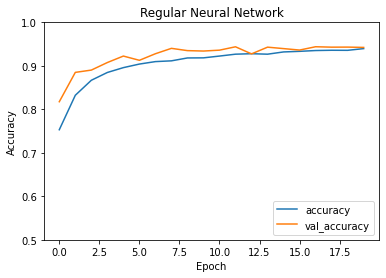

In [23]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("Regular Neural Network")

test_loss, test_acc = model.evaluate(test_image,  test_label, verbose=2)


In [24]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_image)

In [25]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i].reshape(28,28)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


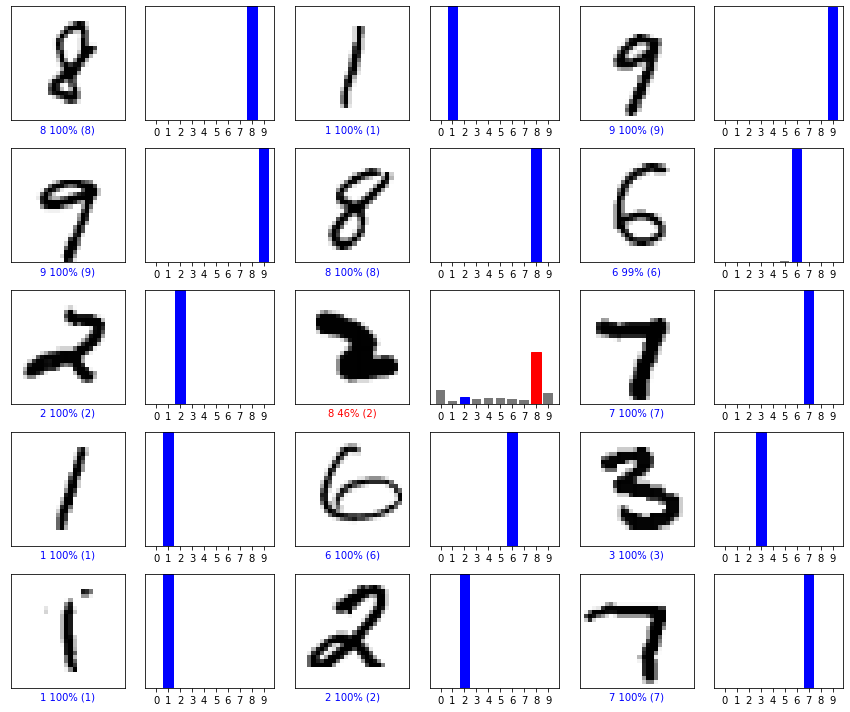

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_label, test_image)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_label)
plt.tight_layout()
plt.show()


In [27]:
train_image.shape

(33600, 28, 28)

Same dataset however this time with CNN


In [28]:
train_image, test_image = train_image / 255.0, test_image / 255.0

In [29]:
train_image = train_image.reshape(33600,28,28,1)
test_image = test_image.reshape(test_image.shape[0],28,28,1)
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [35]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_image, train_label, epochs=20, 
                    validation_data=(test_image, test_label))


Epoch 1/20
1050/1050 [==============================] - 7s 7ms/step - loss: 0.0058 - accuracy: 0.9984 - val_loss: 0.0650 - val_accuracy: 0.9885
Epoch 2/20
1050/1050 [==============================] - 7s 7ms/step - loss: 0.0051 - accuracy: 0.9982 - val_loss: 0.0487 - val_accuracy: 0.9907
Epoch 3/20
1050/1050 [==============================] - 7s 7ms/step - loss: 0.0063 - accuracy: 0.9978 - val_loss: 0.0455 - val_accuracy: 0.9925
Epoch 4/20
1050/1050 [==============================] - 7s 7ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0538 - val_accuracy: 0.9901
Epoch 5/20
1050/1050 [==============================] - 7s 7ms/step - loss: 0.0034 - accuracy: 0.9990 - val_loss: 0.0540 - val_accuracy: 0.9913
Epoch 6/20
1050/1050 [==============================] - 7s 7ms/step - loss: 0.0042 - accuracy: 0.9988 - val_loss: 0.0501 - val_accuracy: 0.9908
Epoch 7/20
1050/1050 [==============================] - 7s 6ms/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 0.0614 - val_accuracy:

263/263 - 0s - loss: 0.0697 - accuracy: 0.9873


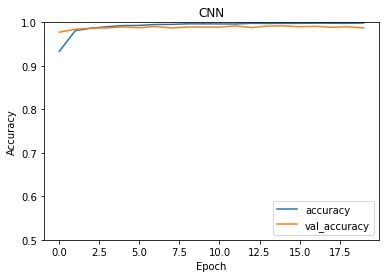

In [32]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("CNN")

test_loss, test_acc = model.evaluate(test_image,  test_label, verbose=2)


In [33]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_image)

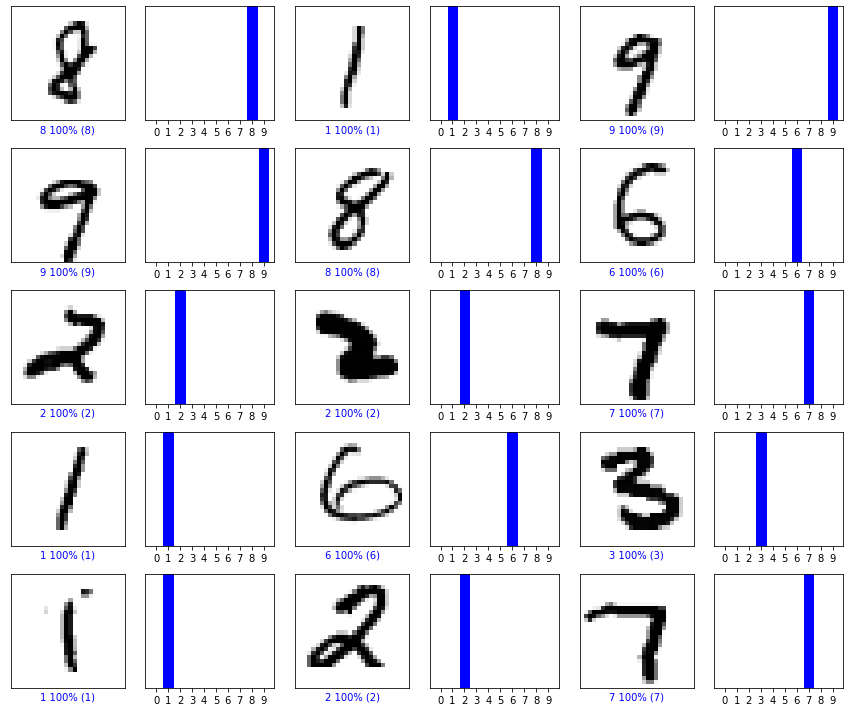

In [34]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_label, test_image)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_label)
plt.tight_layout()
plt.show()
